# Cell Lineage from Normalized Covariance (CLiNC)

This notebook provides methods to reconstruct a cell type hierarchy from clonal barcoding data, and to detect differnetiation pathways that violate the hierarchy. The code below is sufficient to reproduce the panels from Figure 4 in REF.

### Algorithm overview

The input data is a matrix of barcode counts in across cell types. In principle these counts should represent numbers of cells (as opposed to numbers of sequencing reads). The output is an inferred cell type hierarchy and a list of putative tree violations. The only parameter is the false-discovery rate for detection of conformal symmetry violations (default 5%). The CLiNCs pipeline includes the following steps:

1. Calculate normalized covariance between each pair of cell types
2. Use neighbor-joining to iterative form a cell type hierarchy
3. Identify statistically significant deviations from conformal symmetry
4. Use symmetry violations to infer putative differentiation pathways that violate the hierarchy


### Initialize parameters and imports

In [6]:
from CLiNC_util import *

input_data_path = 'barcode_counts.tsv'
output_directory = 'example_output'
symmetry_violation_FDR = 0.05

make_output_dir(output_directory)

### Load input data
Input data should consist of a matrix where each row is a barcoded clone, each column is a cell type, and each entry is a count of cells (the number of cells from the clone in the cell type). Data should be provided as a tab-delimited (tsv) file, with a header consisting of celltype names. Please do not include a label-column (i.e. all columns contain counts data). See example file loaded below. 

Loaded 9301 barcodes in 9 cell types


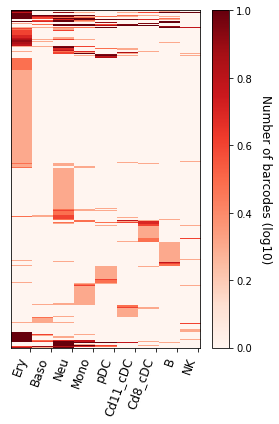

In [7]:
barcode_counts, celltype_names = load_data(input_data_path)
plot_barcode_counts(output_directory, barcode_counts, celltype_names)

### 1. Calculate normalized covariance

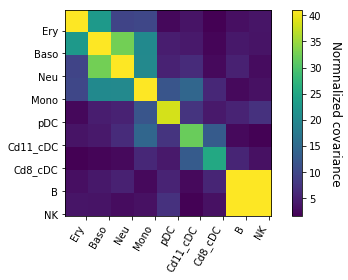

In [8]:
X = get_normalized_covariance(barcode_counts)
plot_normalized_covariance(output_directory, X, celltype_names)

### 2. Use neighbor-joining to iterative form a cell type hierarchy

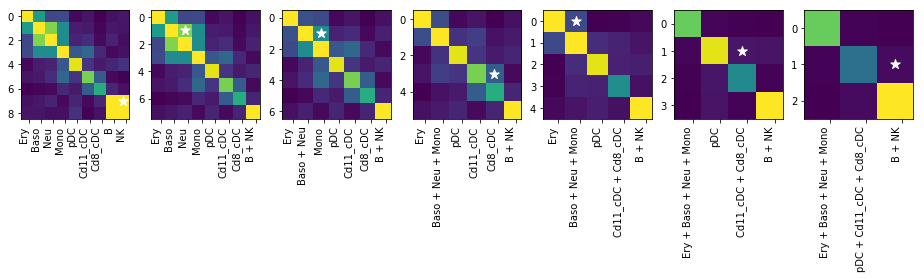

In [9]:
parent_map, node_groups, plot_data = build_hierarchy(barcode_counts)
plot_neighbor_joining(output_directory, node_groups, *plot_data)

In [10]:
print_hierarchy(parent_map, celltype_names)


            /-Cd8_cDC
         /-|
      /-|   \-Cd11_cDC
     |  |
   /-|   \-pDC
  |  |
  |  |   /-NK
  |   \-|
  |      \-B
--|
  |         /-Neu
  |      /-|
  |   /-|   \-Baso
  |  |  |
   \-|   \-Mono
     |
      \-Ery


### 3. Identify statistically significant deviations from conformal symmetry

Detected 18 instances of symmetry violation passing a threshold of 1.9398055098950069 with FDR 0.05


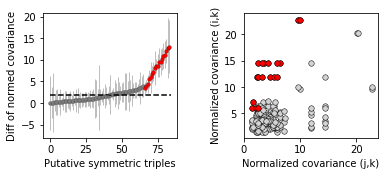

In [11]:
violations, plot_data = detect_symmetry_violations(barcode_counts, parent_map, symmetry_violation_FDR)
plot_violations(output_directory, *plot_data)

### 4. Infer putative differentiation pathways that violate the hierarchy

In [22]:
final_scores, final_transitions, plot_data = detect_cross_tree_transitions(parent_map, violations, barcode_counts.shape[1])
print_cross_tree_transitions(final_scores, final_transitions, parent_map, celltype_names, node_groups, *plot_data)


Symmetry violations can be explained by the following cross-tree transitions:

Match score    Explained symmetry violations    Transition
0.67           2                                Ery -> Baso
0.67           2                                Baso -> Ery
0.57           15                               pDC+Cd11_cDC+Cd8_cDC -> Mono
0.25           16                               B+NK -> pDC
0.25           16                               pDC -> B+NK
0.05           17                               Ery+Baso+Neu+Mono -> pDC
0.05           18                               Ery+Baso+Neu+Mono -> Cd11_cDC


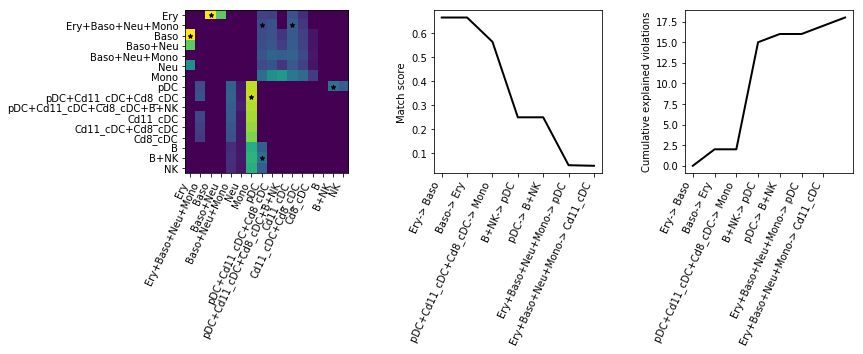

In [23]:
plot_cross_tree_transitions(final_scores, final_transitions, parent_map, celltype_names, node_groups, *plot_data)